In [ ]:
!pip install -q pygmo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 27.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pygmo as pg

In [ ]:
class Sphere:
    @staticmethod
    def fitness(d):
        return [d[0]**2 + d[1]**2]

    @staticmethod
    def get_bounds():
        return ([-3., -3.], [3., 3.])

    @staticmethod
    def get_glob_min():
        return np.array([0, 0, 0])

In [ ]:
class Levi:
    @staticmethod
    def fitness(d):
        return [np.sin(3 * np.pi * d[0])**2 + (d[0] - 1)**2 * (1 + np.sin(3 * np.pi * d[1])**2) + (d[1] - 1)**2 * (1 + np.sin(2 * np.pi * d[1])**2)]

    @staticmethod
    def get_bounds():
        return ([-10., -10.], [10., 10.])

    @staticmethod
    def get_glob_min():
        return np.array([1, 1, 0])

In [ ]:
def visualize_optimization(function, algorithm, title, population_size=100, generations_cnt=100):
    pop = pg.population(function, population_size)

    fitness_list = []
    for i in range(generations_cnt):
        pop = algorithm.evolve(pop)
        fitness_list.append(pop.get_f()[pop.best_idx()])

    gens = np.linspace(0, generations_cnt, generations_cnt)
    fitness_list = np.array(fitness_list)

    fig = plt.figure(figsize = (10, 5))
    ax = plt.axes()

    ax.plot(gens, fitness_list, '-', marker='.', label="Best result")
    ax.plot(gens, np.full(len(gens), function.get_glob_min()[2]), '--', lw=2, label="Global min")

    ax.set_title(title)
    ax.set_xlabel("Generation")
    ax.set_ylabel("Fitness")
    ax.legend()

    return pop.get_x()[pop.best_idx()], pop.get_f()[pop.best_idx()]

SGA

(array([-0.00610629,  0.01609702]), array([0.0002964]))

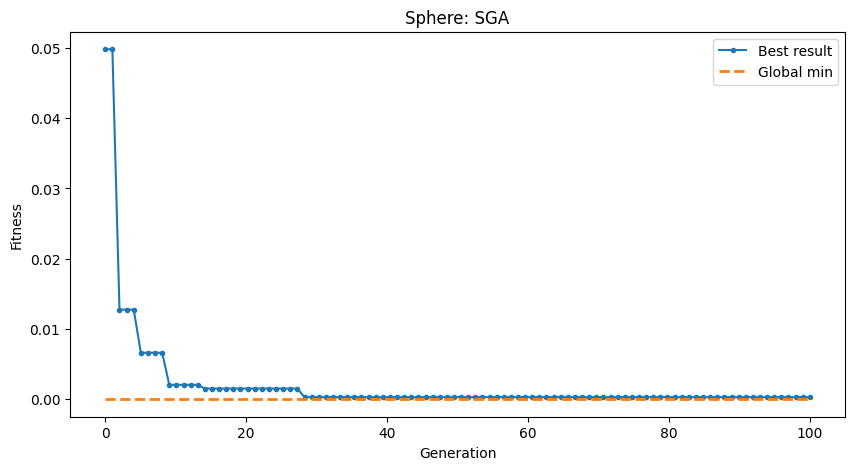

In [ ]:
visualize_optimization(Sphere(), pg.algorithm(pg.sga(1)), 'Sphere: SGA')

(array([0.95813336, 0.9272846 ]), array([0.15655334]))

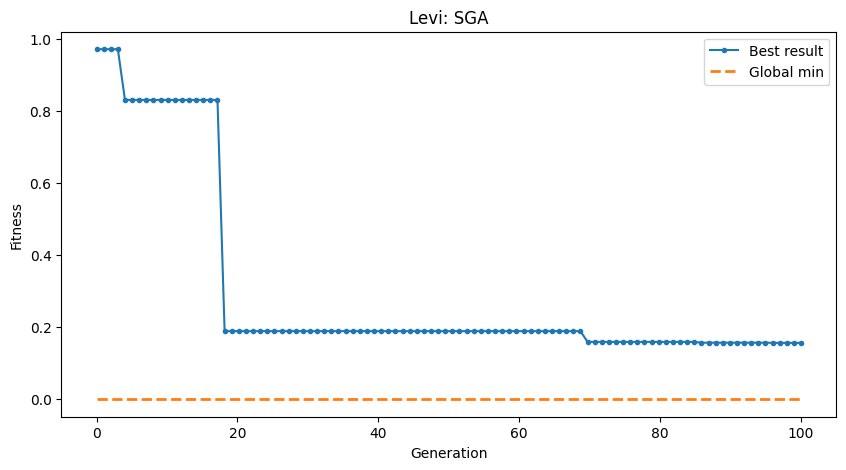

In [ ]:
visualize_optimization(Levi(), pg.algorithm(pg.sga(1)), 'Levi: SGA')

DE

(array([ 5.63707773e-10, -1.46934383e-10]), array([3.39356166e-19]))

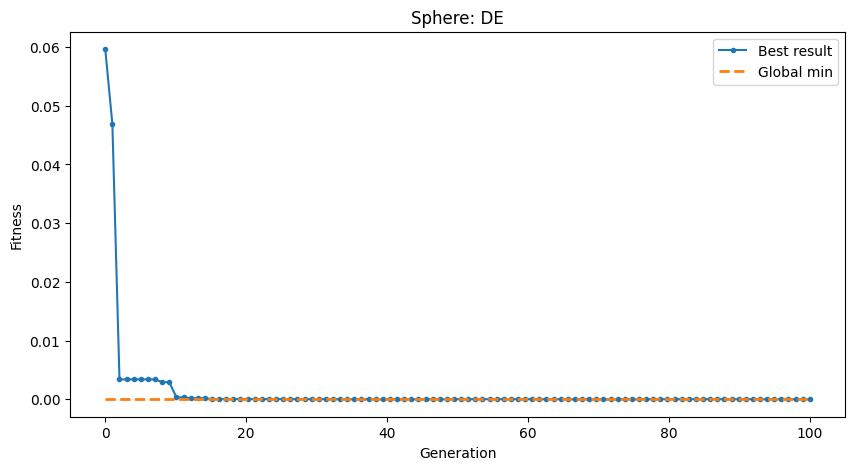

In [ ]:
visualize_optimization(Sphere(), pg.algorithm(pg.de(1)), 'Sphere: DE')

(array([1.00000001, 0.99999981]), array([3.88754169e-14]))

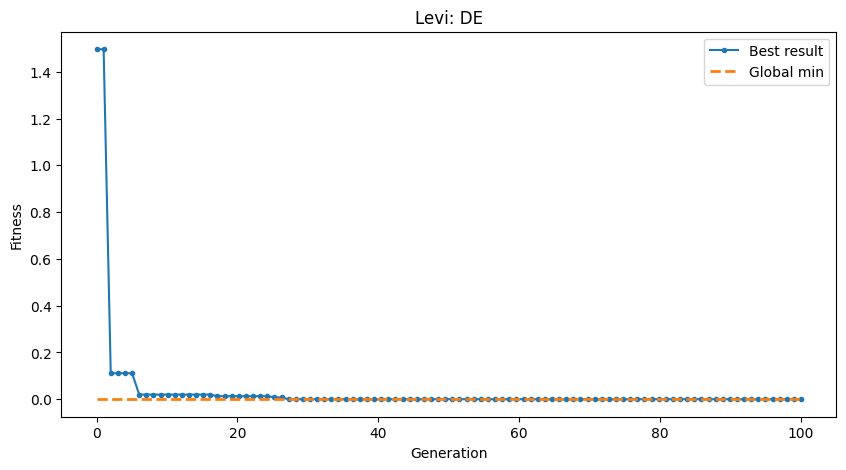

In [ ]:
visualize_optimization(Levi(), pg.algorithm(pg.de(1)), 'Levi: DE')

SADE

(array([3.87160747e-11, 1.26363481e-10]), array([1.74666637e-20]))

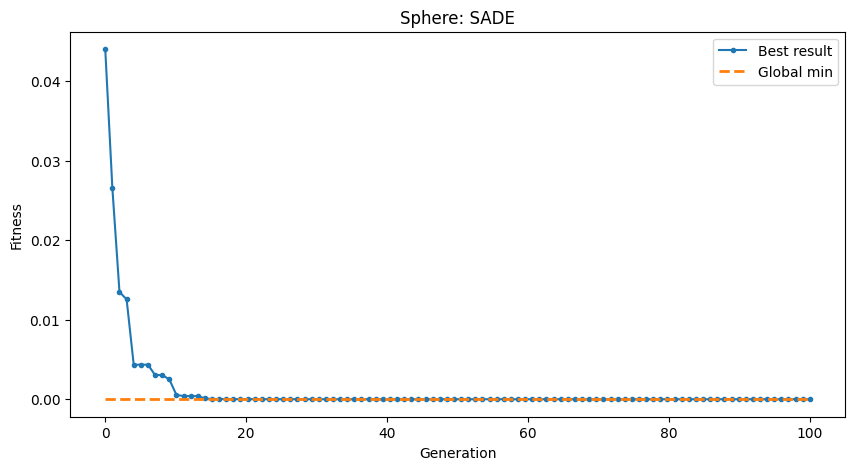

In [ ]:
visualize_optimization(Sphere(), pg.algorithm(pg.sade(1)), 'Sphere: SADE')

(array([1., 1.]), array([1.24132851e-20]))

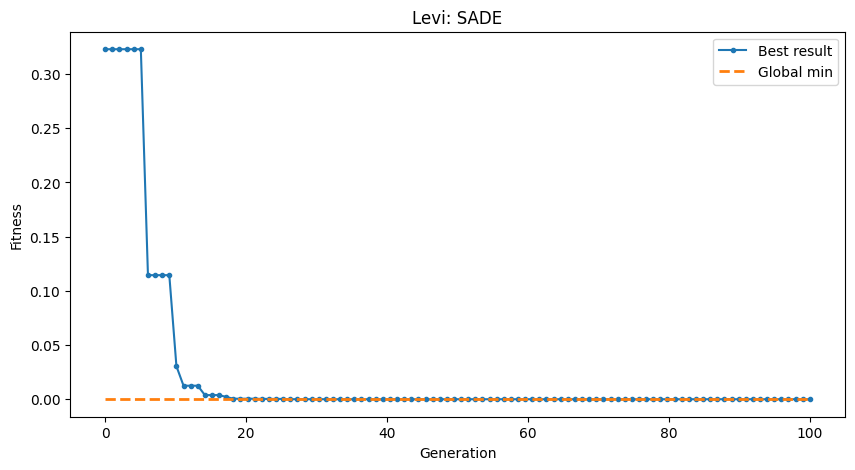

In [ ]:
visualize_optimization(Levi(), pg.algorithm(pg.sade(1)), 'Levi: SADE')